In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [91]:
#importing stock data using Unix Epoch TimeStamp
df = pd.read_csv('C:\\Users\\techane\\Desktop\\data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [92]:
#Convert  Unix Time to  DateTime
df['DATE']= pd.to_datetime(df["DATE"], unit='s')

In [93]:
# setting DATE column as Index
df = df.set_index('DATE')

In [99]:
df.isnull().sum().head()

SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
NASDAQ.ADI     0
dtype: int64

In [100]:
df.index

DatetimeIndex(['2017-04-03 13:30:00', '2017-04-03 13:31:00',
               '2017-04-03 13:32:00', '2017-04-03 13:33:00',
               '2017-04-03 13:34:00', '2017-04-03 13:35:00',
               '2017-04-03 13:36:00', '2017-04-03 13:37:00',
               '2017-04-03 13:38:00', '2017-04-03 13:39:00',
               ...
               '2017-08-31 19:51:00', '2017-08-31 19:52:00',
               '2017-08-31 19:53:00', '2017-08-31 19:54:00',
               '2017-08-31 19:55:00', '2017-08-31 19:56:00',
               '2017-08-31 19:57:00', '2017-08-31 19:58:00',
               '2017-08-31 19:59:00', '2017-08-31 20:00:00'],
              dtype='datetime64[ns]', name='DATE', length=41266, freq=None)

In [101]:
#keep importan columns and remove rest
col_list = ['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
df = df[col_list]

In [102]:
# retaining not-null values in dataset and converting to time series
ts=df[pd.Series(pd.to_datetime(df.index,errors='coerce')).notnull().values]
ts.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [103]:
#no need to drop any record as all columns have equal number of non-null vavlues
ts.index

DatetimeIndex(['2017-04-03 13:30:00', '2017-04-03 13:31:00',
               '2017-04-03 13:32:00', '2017-04-03 13:33:00',
               '2017-04-03 13:34:00', '2017-04-03 13:35:00',
               '2017-04-03 13:36:00', '2017-04-03 13:37:00',
               '2017-04-03 13:38:00', '2017-04-03 13:39:00',
               ...
               '2017-08-31 19:51:00', '2017-08-31 19:52:00',
               '2017-08-31 19:53:00', '2017-08-31 19:54:00',
               '2017-08-31 19:55:00', '2017-08-31 19:56:00',
               '2017-08-31 19:57:00', '2017-08-31 19:58:00',
               '2017-08-31 19:59:00', '2017-08-31 20:00:00'],
              dtype='datetime64[ns]', name='DATE', length=41266, freq=None)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

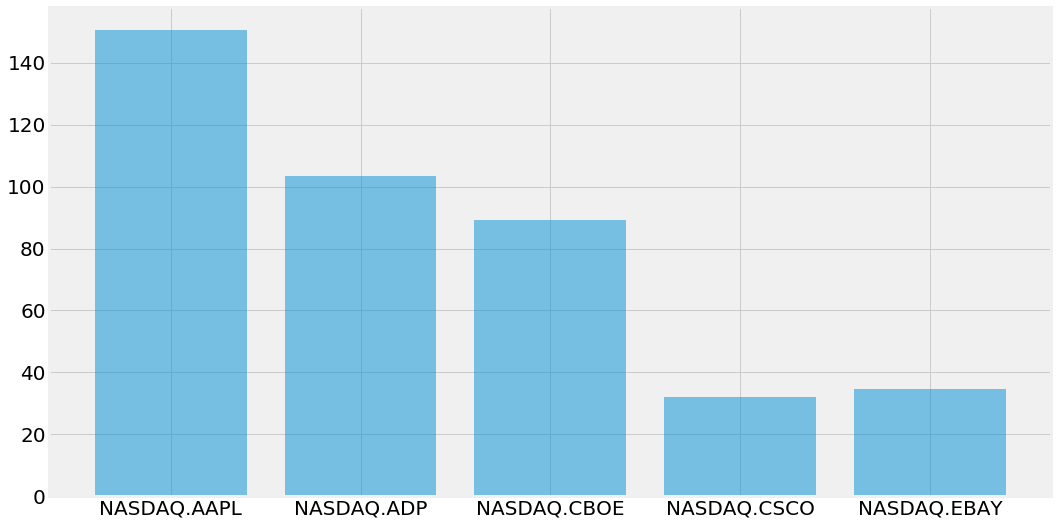

In [104]:
# analyse the  mean of values for all companies
avg_stock = np.mean(ts,axis=0)
col_list = ['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
fig = plt.figure(figsize = (16,9))
x_label = col_list
x_tick = np.arange(len(col_list))
plt.bar(x_tick, avg_stock, align = 'center', alpha = 0.5)
plt.xticks(x_tick, x_label, fontsize = 20)
plt.yticks(fontsize = 20)

In [105]:
avg_stock

NASDAQ.AAPL    150.453566
NASDAQ.ADP     103.480398
NASDAQ.CBOE     89.325485
NASDAQ.CSCO     32.139336
NASDAQ.EBAY     34.794506
dtype: float64

In [106]:
ts.index

DatetimeIndex(['2017-04-03 13:30:00', '2017-04-03 13:31:00',
               '2017-04-03 13:32:00', '2017-04-03 13:33:00',
               '2017-04-03 13:34:00', '2017-04-03 13:35:00',
               '2017-04-03 13:36:00', '2017-04-03 13:37:00',
               '2017-04-03 13:38:00', '2017-04-03 13:39:00',
               ...
               '2017-08-31 19:51:00', '2017-08-31 19:52:00',
               '2017-08-31 19:53:00', '2017-08-31 19:54:00',
               '2017-08-31 19:55:00', '2017-08-31 19:56:00',
               '2017-08-31 19:57:00', '2017-08-31 19:58:00',
               '2017-08-31 19:59:00', '2017-08-31 20:00:00'],
              dtype='datetime64[ns]', name='DATE', length=41266, freq=None)

In [107]:
ts.isnull().sum()

NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [159]:
ts.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [292]:
# minutely total stock
mts = ts.groupby([pd.TimeGrouper('H')]).sum()
mta = mts['NASDAQ.AAPL'] # hourly total stock aapl (hta)
mta.head()

DATE
2017-04-03 13:00:00    4316.4602
2017-04-03 14:00:00    8632.0092
2017-04-03 15:00:00    8611.5377
2017-04-03 16:00:00    8605.6159
2017-04-03 17:00:00    8613.5614
Freq: H, Name: NASDAQ.AAPL, dtype: float64

In [293]:
# applying forcasting model
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

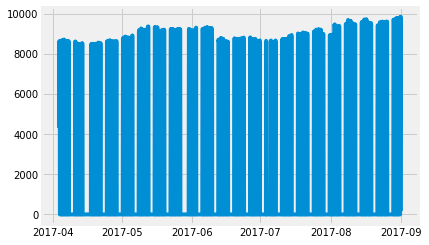

In [294]:
#Graphycally test stationary
plt.plot(mta)

In [295]:
#Test stationarity using DFtest
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 60, center = False).mean()
    rol_std = ts.rolling(window = 60, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Min', fontsize = 10)
    plt.ylabel('Total Stock value', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

In [296]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts)
    print(ts_test)
    ts_test_output = pd.Series(ts_test[0:2], index=['Test Statistic','p-value'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [297]:
TestStationaryAdfuller(mta)

(-7.940939030845537, 3.3153735319876844e-12, 30, 3577, {'1%': -3.4321794657443268, '5%': -2.8623483552705715, '10%': -2.5672003006136257}, 59556.1763609892)
Test Statistic         -7.940939e+00
p-value                 3.315374e-12
Critical Value (1%)    -3.432179e+00
Critical Value (5%)    -2.862348e+00
Critical Value (10%)   -2.567200e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


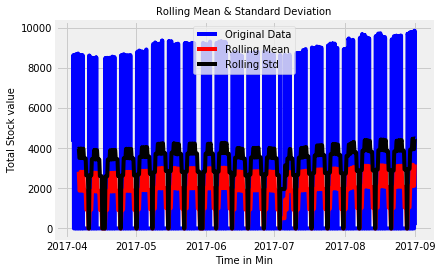

In [298]:
TestStationaryPlot(mta)

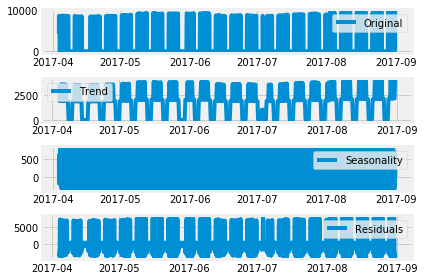

In [299]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mta,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(mta, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

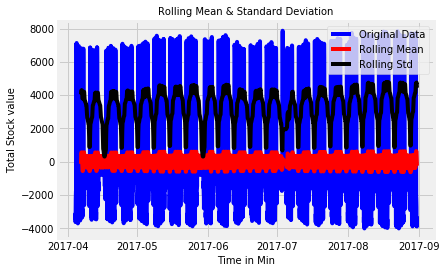

(-20.424700701901862, 0.0, 30, 3547, {'1%': -3.4321949503139497, '5%': -2.862355195057042, '10%': -2.5672039419049475}, 58159.60749904477)
Test Statistic         -20.424701
p-value                  0.000000
Critical Value (1%)     -3.432195
Critical Value (5%)     -2.862355
Critical Value (10%)    -2.567204
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [300]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

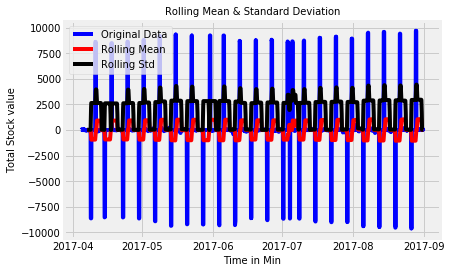

(-10.445708710495136, 1.4820815427222967e-18, 28, 3555, {'1%': -3.432190795523353, '5%': -2.8623533598218875, '10%': -2.5672029648817754}, 59398.26081716412)
Test Statistic         -1.044571e+01
p-value                 1.482082e-18
Critical Value (1%)    -3.432191e+00
Critical Value (5%)    -2.862353e+00
Critical Value (10%)   -2.567203e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [301]:
mte_seasonal_difference = mta - mta.shift(24)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

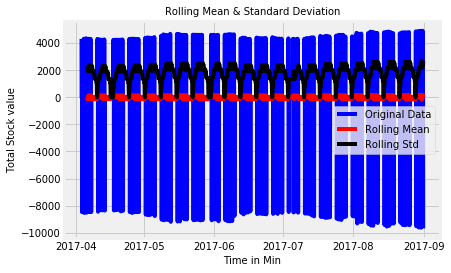

In [302]:
mte_first_difference = mta - mta.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [303]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

(-13.956330422966447, 4.6043196009272875e-26, 30, 3576, {'1%': -3.4321799777078366, '5%': -2.8623485814137557, '10%': -2.567200421005185}, 59544.00870304369)
Test Statistic         -1.395633e+01
p-value                 4.604320e-26
Critical Value (1%)    -3.432180e+00
Critical Value (5%)    -2.862349e+00
Critical Value (10%)   -2.567200e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


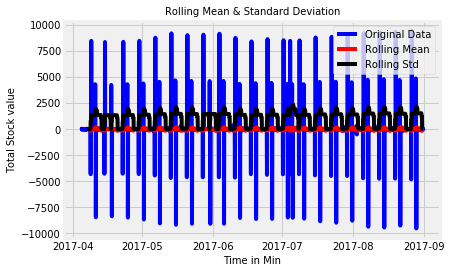

In [304]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(24)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [305]:
# as per Akfuler test the timeseries is stationary 
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

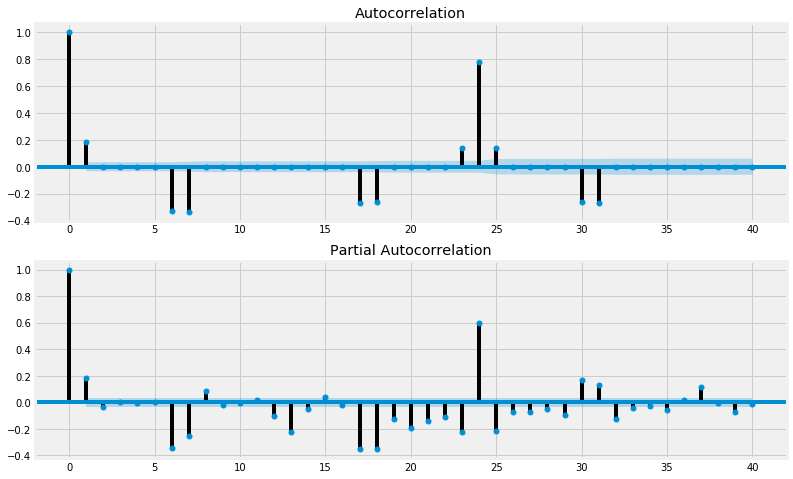

In [306]:
#Find optimal parameters and build SARIMA model
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_first_difference.iloc[24:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_first_difference.iloc[24:], lags=40, ax=ax2)

In [307]:
arma_mod10 = sm.tsa.ARMA(mta, (1,1)).fit()
print(arma_mod10.params)

const                1720.791808
ar.L1.NASDAQ.AAPL       0.785860
ma.L1.NASDAQ.AAPL       0.270964
dtype: float64


In [308]:
print(arma_mod10.aic)

64118.400026427276


In [309]:
from scipy import stats
resid20 = arma_mod10.resid
stats.normaltest(resid20)
# This function tests the null hypothesis that a sample comes
# from a normal distribution.

NormaltestResult(statistic=1476.1457328640672, pvalue=0.0)

In [310]:
mod = sm.tsa.statespace.SARIMAX(mta, 
                                order=(1,1,1), 
                                seasonal_order=(1,1,1,24),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                 3608
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -29684.109
Date:                            Wed, 01 May 2019   AIC                          59378.218
Time:                                    20:40:12   BIC                          59409.101
Sample:                                04-03-2017   HQIC                         59389.230
                                     - 08-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0155      0.383      0.040      0.968      -0.736       0.767
ma.L1          0.1699      0.382   

In [ ]:
mta=0.01(mta-1) + 0.17(et-1) + 0.32(Set-1)

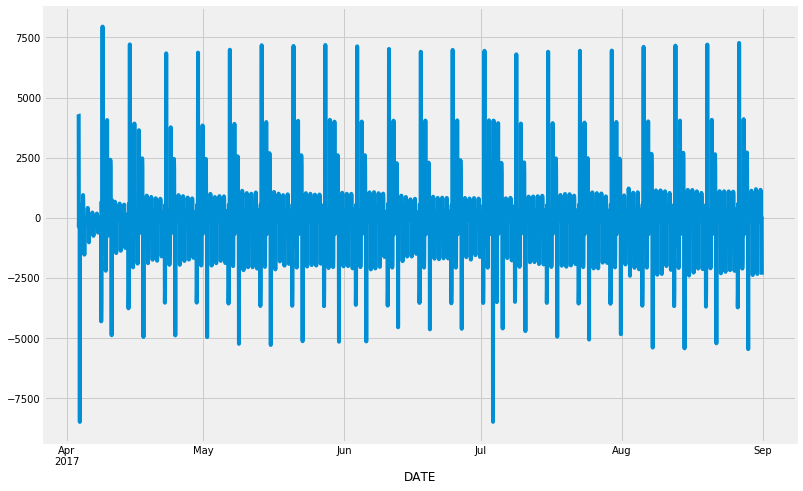

In [311]:
results.resid.plot(figsize=(12,8))

In [324]:
mta.head(50)

DATE
2017-04-03 13:00:00    4316.4602
2017-04-03 14:00:00    8632.0092
2017-04-03 15:00:00    8611.5377
2017-04-03 16:00:00    8605.6159
2017-04-03 17:00:00    8613.5614
2017-04-03 18:00:00    8614.1209
2017-04-03 19:00:00    8626.8028
2017-04-03 20:00:00     143.7000
2017-04-03 21:00:00       0.0000
2017-04-03 22:00:00       0.0000
2017-04-03 23:00:00       0.0000
2017-04-04 00:00:00       0.0000
2017-04-04 01:00:00       0.0000
2017-04-04 02:00:00       0.0000
2017-04-04 03:00:00       0.0000
2017-04-04 04:00:00       0.0000
2017-04-04 05:00:00       0.0000
2017-04-04 06:00:00       0.0000
2017-04-04 07:00:00       0.0000
2017-04-04 08:00:00       0.0000
2017-04-04 09:00:00       0.0000
2017-04-04 10:00:00       0.0000
2017-04-04 11:00:00       0.0000
2017-04-04 12:00:00       0.0000
2017-04-04 13:00:00    4309.4105
2017-04-04 14:00:00    8634.5008
2017-04-04 15:00:00    8660.0546
2017-04-04 16:00:00    8655.2145
2017-04-04 17:00:00    8654.8081
2017-04-04 18:00:00    8679.5834
2017-

In [321]:
#The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are 
#generated using the full history up to that point.
pred = results.get_prediction(start = 3008, end = 3608, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower NASDAQ.AAPL,upper NASDAQ.AAPL
2017-08-06 21:00:00,-1649.626508,3009.273521
2017-08-06 22:00:00,-2443.871816,2215.028213
2017-08-06 23:00:00,-2310.012718,2348.887311
2017-08-07 00:00:00,-2332.752163,2326.147866
2017-08-07 01:00:00,-2328.889012,2330.011017


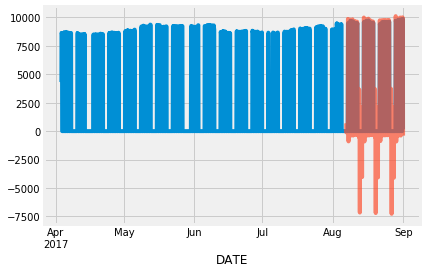

In [322]:
# check accuacy
ax = mta['2017-04-03 13:00:00':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

In [323]:
mte_forecast = pred.predicted_mean
mte_truth = mta['2013-01-31':]
# # Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

NameError: name 'mte_forecast' is not defined